# Week 3: Thermal Field Theory Report


## 1. Questions to Aid in Developing Intuition
Here-on we will use the (I-II-III) system, every question will be labelled by how important it is so if you are struggling with  time, the ones marked I are most important, then II, then III.<br>
Only questions in the numerical section require python answers.

#### 1.1 [ I ] In the $\Phi$ Gaussian theory (only quadratic terms), if $<\Phi(x)\Phi(y)>\propto(x-y)^{-3}$ then $<\Phi(x)\Phi(y)\Phi(z)\Phi(w)\Phi(v)>\propto$?

__Answer:__
 $<\Phi(x) \Phi(y)\Phi(z) \Phi(w)\Phi(v) >$ = 0 since we have an odd number of $\Phi$'s. 

#### 1.2 [ II ] Understanding Defects and Vortices
(a) Can you describe a situation where three vortices can be stable? That is, not need infinite energy to be created from the trivial state.<br>
(b) Is it possible to have a vortex configuration in three dimensions instead of two?<br>
(c) The kind of configuration found in part (b) is known as a *line* defect, can you try to imagine a configuration for a *point* defect in three dimensions?

__Answer:__
* (a)Yes, we can have a stable configuration with three vortices as long as the total winding number is equal to $0$. 
* (b) We can have a vortex in three dimensions, by simply looking perpendicularly at an axis and then having a 2-dimensional vortex along this fixed dimension. (Sort of like a cilindrical vortex structure).
* (c) Assuming superposition of the defects, we could have two vortices with line defects that intersect at a point, and thus make an overall point defect.

#### 1.3 [ I / II ] Understanding Groups
(a) [ I ] Can you give an example of a system with $Z$ symmetry group? (We have met one already) <br>
(b) [ II ] What are some subgroups of the group of rotations in three dimensions? (This group is called $O(3)$)

__Answer:__
* (a) In the 1D ising system we found a $\mathbf{Z}$ symmetry group in the translation of the lattice $\sigma_i \to \sigma_{i+k}$. Note that this was a space symmetry rather than internal symmetry of the system, in contrast to the $\mathbf{Z}_2$ symmetry of $\sigma_i \to -\sigma_i$. 

* (b) We have several subgroups of $O(3)$, some of them being:
    - $SO(3)$, rotations with positive determinant (no reflections)
    - $\mathbf{Z}_2$ the reflection symmetry
    - $O(1), O(2), SO(1), SO(2)$ all the other rotations along lower dimensions form a group under themselves.


#### 1.4 [ I ] If a linear term, like $\alpha\psi$, is added to the potential $m\psi^2+\lambda \psi^4$, what effect will this have on the set of ground states? $(m<0,\lambda>0,\psi\in C)$
In fact this is the mechanism by which you can think that the 'environment' helps spontaneously choose a ground state, since random linear couplings from the environment can induce a preference.

A coupling term of this sort will break the symmetry of the Hamiltonian, as one of the states will be energetically preferred over the other. In the 1D case, we can see that, even though we initially had two solutions with $\mathbf{Z}_2$ symmetry (one below 0, one above), we see than the preffered solution will be only the negative (positive) if $\alpha$ is positive (negative).

#### 1.5 [ I ] Why is the density a bad variable to focus on for the Liquid-Solid transition?

Density is a bad variable to focus on because both Liquids and Solids are incompressible, and thus the density is not the variable that will describe the drastic change itself (the phase transition). 

#### 1.6 [ I ] If I have a square whose left half is painted yellow and right half is painted blue, what is the set of symmetries which keep the square 'looking the same'?

We can have a reflection along the axis perpendicular to the "domain wall", and this will leave the sqaure looking the same. We could also have a reflection along the axis of the domain wall, but we would also need to do $\text{yellow} \leftrightarrow \text{blue}$ .

## 2. Numerical Exercises

#### 2.1 [ I ] Field Configurations and Vortices
$\textbf{Note:}$ The solutions from Week 2 will be useful here.<br><br>
(a) [ I ] Create an $N\times N$ lattice which hosts a 2D unit vector at every point. Visualize a random configuration.<br>
(b) [ I ] Write the an Energy function for a given configuration using $H=-J\sum_{<ij>}\vec{x}_i\cdot\vec{x}_j$.<br>
(c) [ I ] Create a vortex configuration and plot its energy for various $N$, compare with the answer from 3.2a.<br>
(d) [ III ] Add *local* terms (at most nearest neighbour) to the boundary spins of an $N\times N$ system such that the energy of a vortex configuration is zero.

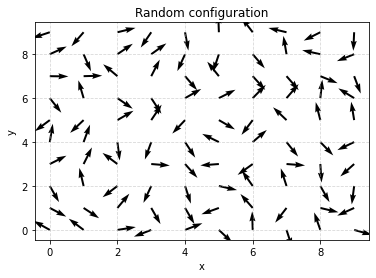

In [1]:
import numpy as np
import matplotlib.pyplot as plt
N = 10
random_config = np.random.rand(N, N, 2)*2 - 1
random_config = random_config/np.linalg.norm(random_config, axis=-1)[..., None]

def visualize_config(config: np.ndarray, title: str=None) -> None:
    N1, N2 = config.shape[:-1]
    X, Y = np.meshgrid(np.arange(N1), np.arange(N2))
    plt.quiver(X, Y, config[..., 0], config[..., 1])
    plt.grid(ls='--', alpha=0.5)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.show()

visualize_config(random_config, 'Random configuration')

In [2]:
def energy_calc(config: np.ndarray, J: float=1) -> float:
    """Calculates the energy of a given configuration"""
    return -J*(np.sum(config[:-1,:,:]*config[1:,:,:]) + np.sum(config[:,:-1,:]*config[:,1:,:]))

print(energy_calc(random_config))

-5.101218074018323


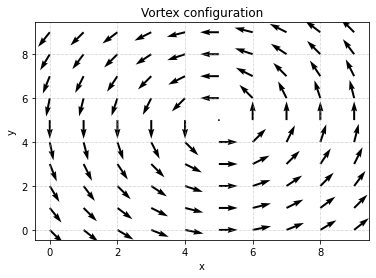

In [3]:
X, Y = np.meshgrid(np.arange(N), np.arange(N))
vortex_pos_idx = np.array([N//2, N//2])
vortex_config = np.zeros((N, N, 2))
vortex_config[:,:,0] = -(Y-vortex_pos_idx[1])
vortex_config[:,:,1] = (X-vortex_pos_idx[0])
vortex_norm = np.linalg.norm(vortex_config, axis=-1)
vortex_config = np.divide(vortex_config, vortex_norm[..., None],
                          out=np.zeros_like(vortex_config), where=vortex_norm[..., None]!=0)
visualize_config(vortex_config, 'Vortex configuration')

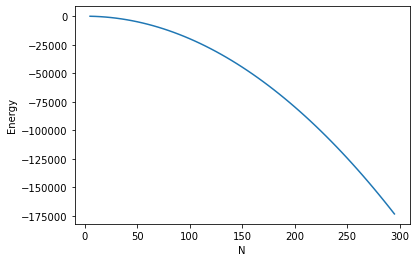

In [4]:
Ns = np.arange(5, 300, 5)
energies_vortex = np.zeros(len(Ns))
for idx, n in enumerate(Ns):
    X, Y = np.meshgrid(np.arange(n), np.arange(n))
    vortex_pos_idx = np.array([n//2, n//2])
    vortex_config = np.zeros((n, n, 2))
    vortex_config[:,:,0] = -(Y-vortex_pos_idx[1])
    vortex_config[:,:,1] = (X-vortex_pos_idx[0])
    vortex_norm = np.linalg.norm(vortex_config, axis=-1)
    vortex_config = np.divide(vortex_config, vortex_norm[..., None],
                          out=np.zeros_like(vortex_config), where=vortex_norm[..., None]!=0)
    energies_vortex[idx] = energy_calc(vortex_config)
plt.plot(Ns, energies_vortex)
plt.xlabel('N')
plt.ylabel('Energy')
plt.show()
    

In [5]:
def energy_with_boundary(config: np.ndarray, J: float=1) -> float:
    """Calculates the energy of a given configuration"""
    x_shift_config = np.roll(config, 1, axis=0)
    y_shift_config = np.roll(config, 1, axis=1)
    energy = -J*(np.sum(config*x_shift_config + config*y_shift_config))
    return energy

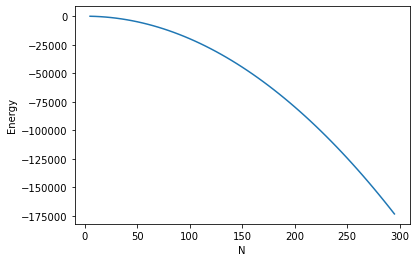

In [6]:
energies_vortex_boundary = np.zeros(len(Ns))
for idx, n in enumerate(Ns):
    X, Y = np.meshgrid(np.arange(n), np.arange(n))
    vortex_pos_idx = np.array([n//2, n//2])
    vortex_config = np.zeros((n, n, 2))
    vortex_config[:,:,0] = -(Y-vortex_pos_idx[1])
    vortex_config[:,:,1] = (X-vortex_pos_idx[0])
    vortex_norm = np.linalg.norm(vortex_config, axis=-1)
    vortex_config = np.divide(vortex_config, vortex_norm[..., None],
                          out=np.zeros_like(vortex_config), where=vortex_norm[..., None]!=0)
    energies_vortex_boundary[idx] = energy_with_boundary(vortex_config)
plt.plot(Ns, energies_vortex)
plt.xlabel('N')
plt.ylabel('Energy')
plt.show()


#### 2.2 [ I ] Critical Behaviour of D>>1 Ising Model in Mean Field
$\textbf{Note:}$ Both $m,\chi$ are functions of $\beta$<br><br>
(a) [ I ] The mean field solution of the Ising model gives a self consistency equation $m=\tanh(\beta(h+qJm))$ where $q$ is the number of neighbours. Set $h=0$ and use the Newton-Raphson algorithm to find solutions for various $\beta$. Here is link to a detailed python tutorial for Newton-Raphson (https://www.youtube.com/watch?v=szQUIRPrAgQ)<br>
(b) [ I ] Find the critical temperature $T_c$ which is the lowest temperature after which there is an $m\neq0$ solution.<br>
(c) [ I ] Define $t=\frac{T-T_c}{T_c}$, as $T$ approaches $T_c$ from below, suppose we always pick the positive $m$ solution, you will find that the value of $m_{+}=C\cdot|t|^{\alpha}$, find $\alpha$ by finding the value of $m_{+}$ at various points below $T_c$ and fitting to a curve of the form $C\cdot|t|^{\alpha}$. Here is a simple tutorial on curve-fitting in python (https://www.youtube.com/watch?v=6BRr_MYMLo4).<br>
(d) [ II ] Now define the susceptibility $\chi=\frac{\partial m}{\partial h}\Big|_{h=0}$. The way to find this derivative is to find $m$ as done in part (a) for a given value of $\beta$ with $h=0$ and at $h=\delta$ where $\delta$ is a small value like 0.01, then take their difference and divide by $\delta$. Using the same procedure as (c), find the critical exponents for $\chi$, that is:
$$\chi=\begin{cases}A|t|^\gamma&T\to T_c,\;T<T_c\\2A|t|^\gamma&T\to T_c,\; T>T_c\end{cases}$$
Find $\gamma$.

In [7]:
from typing import Callable
def newtons_method(f: Callable[[float], float], x0: float,
                   max_iter: int=1000, tol: float=1e-6, deriv_param: float=1e-5) -> float:
    """Newton's method for finding the root of a function"""
    x = x0
    for _ in range(max_iter):
        x_new = x - f(x)/((f(x+deriv_param)-f(x))/deriv_param)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

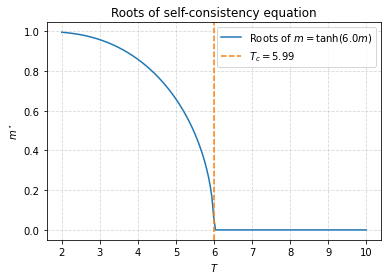

In [8]:
betas = np.linspace(0.1, 0.5, 300)
q, J = 4, 1.5
roots = np.zeros(len(betas))
for idx, beta in enumerate(betas):
    roots[idx] = newtons_method(lambda m: np.tanh(beta*q*J*m)-m, 1)
T_c = 1/np.min(betas[roots>1e-10])
plt.xlabel(r'$T$')
plt.ylabel(r'$m^\star$')
plt.plot(1/betas, roots, label=fr'Roots of $m=\tanh({J*q}m)$')
plt.axvline(T_c, ls='--', label=rf'$T_c=${T_c:.2f}', c='C1')
plt.legend()
plt.title('Roots of self-consistency equation')
plt.grid(ls='--', alpha=0.5)
plt.show()

We see that $T_c= Jq$ is the critical temperature.

[0.49900209 0.54080269]


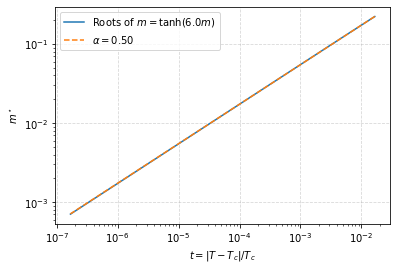

In [9]:
Tc = J*q
Ts = np.linspace(J*q-0.1, J*q-1e-6, 100)
roots = np.zeros(len(Ts))
t = (Ts-Tc)/Tc
for idx, T in enumerate(Ts):
    roots[idx] = newtons_method(lambda m: np.tanh(1/T*q*J*m)-m, 1)
degs = np.polyfit(np.log(np.abs(t)), np.log(np.abs(roots)), 1)
print(degs)
plt.loglog(np.abs(t), roots, label=fr'Roots of $m=\tanh({J*q}m)$')
plt.xlabel(r'$t = |T-T_c|/T_c$')
plt.ylabel(r'$m^\star$')
plt.loglog(np.abs(t), np.abs(t)**degs[0]*np.exp(degs[1]), label=fr'$\alpha={degs[0]:.2f}$', ls='--')
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.show()


We see that $\alpha=\frac{1}{2}$.

In [10]:
from scipy.optimize import brentq  # nicer root finding algorithm than Newton's method

def magnetic_sucep(T: float, J: float, q: float) -> float:
    delta = 1e-10
    """Calculates the magnetic suceptibility of the system"""
    m1 = newtons_method(lambda m: np.tanh(1/T*(q*J*m+delta))-m, 0)
    m2 = newtons_method(lambda m: np.tanh(1/T*(q*J*m))-m, 0)
    return (m1-m2)/delta

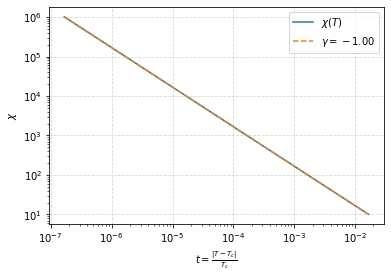

In [11]:
magnetic_sucep_arr = np.zeros(len(Ts))
for idx, T in enumerate(Ts):
    magnetic_sucep_arr[idx] = magnetic_sucep(T, J, q)
degs_chi = np.polyfit(np.log(np.abs(t)), np.log(np.abs(magnetic_sucep_arr)), 1)
plt.xlabel(r'$t = \frac{|T-T_c|}{T_c}$')
plt.ylabel(r'$\chi$')
plt.loglog(np.abs(t), np.abs(magnetic_sucep_arr), label=fr'$\chi(T)$')
plt.loglog(np.abs(t), np.abs(t)**degs_chi[0]*np.exp(degs_chi[1]), label=fr'$\gamma={degs_chi[0]:.2f}$', ls='--')
plt.legend()
plt.grid(ls='--', alpha=0.5)
plt.show()

We see that $\gamma = -1$

## 3. Analytical Exercises

#### 3.1 [ I - II ] Gaussian Integrals and Wick's Theorem
In this problem we will work out the details of the relationships involving field expectation values on a $Z\times Z$ lattice:<br>
(a) [ I ] Given an $N\times N$ symmetric matrix $A$ (non-degenerate) and an arbitrary $N-$vector $J$ show that $$K[J]=\int_{-\infty}^\infty dx_1\dots dx_{N}e^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}=\left(\frac{(2\pi )^N}{\det [A]}\right)^{1/2}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}$$ Where $x$ denotes a column vector of the variables $x_1,...,x_N$, $x^T$ is the transposed row vector.<br>
(b) [ I ] Show that $$<x_i...x_j>=\frac{1}{K[0]}\left[\frac{\partial}{\partial J_i}...\frac{\partial}{\partial J_j}K[J]\Big|_{J=0}\right]$$<br>
(c) [ II ] Now show that $<x_ix_j>=A^{-1}_{ij}$<br>
(d) [ II ] Now prove Wick's theorem, specifically show the case $<x_ix_jx_kx_l>$ directly and extrapolate the general idea.

__Answer:__
* (a) We start by looking at $x^T\cdot A\cdot x-2J^T\cdot x = x_i A^i{}_j x^j-2J_ix^i$, where the indices are raised and lowered with $\delta_{ij}$. 

Then, we have:
$x^T\cdot A\cdot x-2J^T\cdot x = x^T\cdot A\cdot x-2J^T\cdot x +J^T\cdot A^{-1}\cdot J- J^T\cdot A^{-1}\cdot J $.

We also recall that that a matrix $A$ is positive definite iff there exists a matrix $B$ such that $A = B^T B$. Here, $A^{-1}=(B^T B)^{-1} = B^{-1}(B^T)^{-1}$. Then, we have:


\begin{align*}
(Bx - (B^{-1})^TJ)^T (Bx - (B^{-1})^T J) &= x^T B^T B x- x^T B^T (B^{-1})^T J - J^TB^{-1}Bx + J^T B^{-1} (B^{-1})^T J \\
&=x^T A x - 2J^T x +J^T A^{-1}J
\end{align*}

where we have used that $(B^{-1})^T = (B^{T})^{-1}$ and $J^T x = x^T J$.
Now, notice that if we let $y\coloneqq Bx - (B^{-1})^TJ$, the measure $d^N y = \det(B) d^N x$. Furthermore, we also have that 
$$\det(B)= \prod_{\lambda \in \sigma(B)}\lambda = \prod_{\lambda \in \sigma(A)}\sqrt{\lambda} = \left(\prod_{\lambda \in \sigma(A)}\lambda\right)^{1/2} = \sqrt{\det{A}}$$
where we have used that the eigenvalues of the square root of a (diagonalizable) matrix are just the square root of the eigenvalues of the matrix, and the determinant is the product of eigenvalues. Then, we see that the expression
$$K[J]=\int_{-\infty}^\infty d^N xe^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}=\int_{-\infty}^\infty \frac{d^N y}{\sqrt{\det A}} e^{-\frac{1}{2}y^T\cdot y+  \frac{1}{2}J^T\cdot A^{-1}\cdot J}$$
Notice the last term in the phase is independent of $y$ and thus a constant under integration, while the first term becomes simply $N$ decoupled gaussian integrals. Thus, we have
$$K[J] =\frac{1}{\sqrt{\det A}}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J} \left(\int dy e^{-x^2/2}\right)^N = \frac{(2 \pi)^{N/2}}{\sqrt{\det A}}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}$$



* (b) We first consider:

\begin{align*}
    \frac{\partial K[J]}{\partial J_i} &= \int_{-\infty}^\infty d^N xe^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}\frac{\partial}{\partial J_i}(-\frac{1}{2}x_m A^m{}_n x^n+J_k x^k) \\
    &=  \int_{-\infty}^\infty d^N xe^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}x^k \delta^i_k = K[J]<x^i>_{K[j]}
\end{align*}

That is, we obtain the unnormalized one points correlator w.r.t $K[J]$ rathen than $K[0]$. Clearly, setting $J=0$ and normalizing yields the desired result.

For second derivatives, we notice:
\begin{align*}
    \frac{\partial^2 K[J]}{\partial J_j \partial J_i} &= \frac{\partial}{\partial J_j} \int_{-\infty}^\infty d^N xe^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}x^i \\
    &= \int_{-\infty}^\infty d^N x\left[\frac{\partial}{\partial J_j}(e^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x})x^i + e^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x} \underbrace{\frac{\partial}{\partial J_j}(x^i)}_{=0}\right]\\
    &= \int_{-\infty}^\infty d^N xe^{-\frac{1}{2}x^T\cdot A\cdot x+J^T\cdot x}x^i x^j\\
    &= K[J]<x^i x^j>_{K[J]}
\end{align*}

Similarly for higher order derivatives.

* (c) We have:

\begin{align*}
    <x^i x^j> &= \frac{1}{K[0]}\frac{\partial^2 K[J]}{\partial J_i \partial J_j} \Big\vert_{J=0}=\frac{\partial^2}{\partial J_i \partial J_j}(e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J})\Big\vert_{J=0}\\
    &=\frac{1}{2}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}\frac{\partial^2}{\partial J_i \partial J_j}(\delta_{ab}A^b{}_cJ^aJ^c)+O(J)\Big\vert_{J=0}\\
    & = \frac{1}{2}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}\frac{\partial}{\partial J_i}(A^j{}_c J^c+\delta_{ab}A^{b j} J^a)\Big\vert_{J=0}\\
    & = \frac{1}{2}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}(A^{ji}+A^{ij})\Big\vert_{J=0}= (A^{-1})^{ij}
\end{align*}
Where, only through this set of equations, we have used $A_{ij}$ to represent the coordinates of $A^{-1}$ for convenience (up until the last equation, were we have properly used $A^{-1}$). Also, we have pulled in both derivatives instead of letting the second derivative act on both the exponential and the derivative of the exponent through the product rule because the second term is proportional to $J$ and thus vanishes when setting $J=0$.



* (d) We analyze $$<x_i x_j x_k x_l>=\frac{1}{K[0]}\frac{\partial^{4}}{\partial J^{i} \partial J^{j}\partial J^{k} \partial J^{l}}K[J] \Big\vert_{=0}= \frac{\partial^{4}}{\partial J^{i}\ldots \partial J^{l}}e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}\Big\vert_{=0}$$

Here, we introduce the notation $\partial_i \equiv \frac{\partial}{\partial J^i}$, and also consider the following equation which will be used often: 

$$\partial_i \left(\frac{1}{2}J^T \cdot A^{-1}\cdot J \right)= \frac{1}{2}\partial_i\left(J^a A^{-1}_{a b}J^b\right) = \frac{1}{2}(A^{-1}_{i b}J^b+A^{-1}_{a i}J^a)= A^{-1}_{i a}J^a$$

where in the last line we have used the symmetry of $A^{-1}_{ab}$, which is symmetric because $A^a{}_{b}$ is symmetric and the metric $\delta$ is too.

We proceed to expand:
\begin{align*}
    \partial_i \partial_j \partial_k \partial_l (e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}) &=\partial_i \partial_j \partial_k (e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}\cdot A^{-1}_{l a}J^a) \\
    &=\partial_i \partial_j [\partial_k(e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J})A^{-1}_{l a}J^a+e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}A^{-1}_{l k}]\\
    &=\partial_i \partial_j[e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}(A^{-1}_{k a}A^{-1}_{l b}J^a J^b+A^{-1}_{l k})]\\
    &=\partial_i \left(e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}\left[A^{-1}_{j a}J^a(A^{-1}_{k a}A^{-1}_{l b}J^a J^b+A^{-1}_{l k})+(A^{-1}_{j k} A^{-1}_{b l}J^b+A^{-1}_{j l} A^{-1}_{b k}J^b) \right] \right)\\
    &=e^{\frac{1}{2}J^T\cdot A^{-1}\cdot J}
        \left( 
            A^{-1}_{j i}A^{-1}_{k l} + A^{-1}_{j k}A^{-1}_{i l}+A^{-1}_{j l}A^{-1}_{i k}+O(J)
        \right)\\
    & \xrightarrow{J \to 0} A^{-1}_{j i}A^{-1}_{k l} + A^{-1}_{j k}A^{-1}_{i l}+A^{-1}_{j l}A^{-1}_{i k}
\end{align*}

And thus Wick's Theorem is fulfilled.

#### 3.2 [ I - II - III ] Vortices: Stability and Instability
(a) [ I ] Suppose the configuration of a vortex at the origin is given by:
$$\phi=f(r)e^{i n\theta} \equiv f(r)e^{i\Theta}$$ 
Here $n$ is the winding number. Show that it has infinite energy in the reduced Hamiltonian
$$H=D\int d^2x\left[\frac{|\phi|^2}{|\vec{x}|^2}(\partial_{\theta}\Theta)^2\right]$$
 (D is a constant).<br>
For $f(r)$ assume any function which goes to 0 at the origin and asymptotes to $1$ as $r\to\infty$.<br>
(b) [ II] Take a 'vortex-dipole', that is, place one vortex configuration at $x=-1$ and place its counter partner at $x=1$ and show that this configuration has finite energy.<br>
(c) [ III ] Find the 'force-law' between the two vortices at various distances.

__Answer:__

- (a) We start by computing $\partial_\theta \Theta = n$
<!-- - (a) We start by computing $\nabla \theta$: given that $\tan(\theta) = \frac{x}{y}$, and $\frac{d \tan \mu}{d \mu}= \frac{1}{1+\mu^2}$, we find 
$$\frac{\partial \theta}{\partial x} = \frac{1}{1+\frac{x}{y}^2}\frac{1}{y}= \frac{y}{y^2+x^2}, \quad \frac{\partial \theta}{\partial y} = -\frac{1}{1+\frac{x}{y}^2}\frac{x}{y^2}= -\frac{x}{x^2+y^2}$$ -->
<!-- 
Thus, $\nabla \theta= \frac{y}{x^2+y^2}\hat{x}-\frac{x}{x^2+y^2}\hat{y}$, and hence $(\nabla \theta)^2 = \frac{1}{x^2+y^2}$. -->

Now, note that $|\psi|^2 = |f|^2$, and (changing the measure to polar coordinates and using angular symmetry), our integral reduces to:
$$ H = 2 \pi D \int_0^\infty r dr\left[\frac{n^2|f(r)|^2}{r^2}\right]$$
Assuming $f$ is smooth (or "properly behaved"), there exists an $M$ such that $|f(x)| >\frac{1}{2} \;\;\forall x \geq M$ since it asymptotes to 1. Then

$$H \geq 2 \pi D \int_M^\infty dr\left[\frac{|f(r)|^2}{r}\right] \geq \frac{\pi D}{2} \lim_{r_{\max}\to \infty}\int_M^{r_{\max}} dr\left[\frac{1}{r}\right] =   \lim_{r_{\max}\to \infty} \log\left(\frac{r_{\max}}{M}\right) \to \infty$$

which diverges logarithmically (or if $M=0$).

* (b) Now we look at two vortices, located at $\vec{x}_1 \coloneqq (a, 0)^T$ and $\vec{x}_2 \coloneqq (-a, 0)^T$. Here, for the following, we will consider
 
 $$\Theta(\vec{x}) = n_1\arg(\vec{x}-\vec{x}_1)+n_2\arg(\vec{x}-\vec{x}_2)$$
  where we define $\arg(\vec{a})= \arctan{\frac{a_2}{a_1}}$. In the following, we will denote $\vec{y}=\vec{x}-\vec{x}_1$ and $\vec{z} = \vec{x}-\vec{x}_2$, and notice that $\frac{\partial \vec{y}}{\partial \vec{x}}=\frac{\partial \vec{z}}{\partial \vec{x}}= \mathbf{1}$. 

$$\nabla \Theta (x) = -\left(n_1\frac{y_2}{|\vec{y}|}+n_2\frac{z_2}{|\vec{z}|} \right)\hat{x} + \left(n_1\frac{y_1}{|\vec{y}|}+n_2\frac{z_1}{|\vec{z}|}\right) \hat{y}$$

We consider the quantities
  $ \eta = \delta^{i j}\partial_i \partial_j \Theta$ and 
  $\xi = \epsilon^{i j}\partial_i \partial_j \Theta$, where $\epsilon$ is the totally antisymmetric tensor. We have:

  \begin{align*}
   \eta&= -n_1 y_2\frac{\partial}{\partial y_1}\left(\frac{1}{|\vec{y}|}\right) -n_2 z_2\frac{\partial}{\partial z_1}\left(\frac{1}{|\vec{z}|}\right)+n_1 y_1\frac{\partial}{\partial y_2}\left(\frac{1}{|\vec{y}|}\right)+ n_2 z_1\frac{\partial}{\partial z_2}\left(\frac{1}{|\vec{z}|}\right)\\
    & = \frac{n_1 y_1 y_2- n_1 y_1 y_2}{|y|^3}+ (y, n_1)\leftrightarrow (z, n_2)
  \end{align*}
  Which is evidently $0$ except at the $|\vec{x}| = 0$ or $|\vec{z}|=0$, where the functions $\partial_i \Theta$ are ill defined. Nonetheless, we can use the $2D$ divergence theorem to notice that:
  $$\int_{\mathbf{D}_\varepsilon} \mathrm{d}^2 x\; \nabla^2 \Theta = \oint_{\partial \mathbf{D}_\varepsilon}\nabla \Theta \cdot \hat{n}dl = 0$$
  where $\mathbf{D}_\varepsilon$ is a disc of radius $\varepsilon$ centered around $\hat{y} =0$ (or $z$) and $\hat{n}$ is a vector perpendicular to its boundary $\partial \mathbf{D} _\varepsilon$ (so pointing radially outwards from $\vec{y}=0$ as the origin), and we obtain the last equality by noticing that $\nabla \Theta$ as we have written it is perpendicular to $\hat{n}$ infinitesimally close to $\vec{y} = 0$. Since this is true $\forall \varepsilon$ small, we have $\eta = \nabla^2 \Theta=0$ at the origin too.

  Likewise, we analyze $\xi$, for which we would normally have $\xi = 0$ if $\Theta\in C^2$ (since we have $\epsilon$ antisymmetric and $\partial^2$ symmetric), but since $\Theta$ is not continuosly differentiable at the origin, we have to analyze its behaviour near the origin. Indeed, now using Stokes Theorem we obtain
  
  $$
   \int_{\mathbf{D}_ \varepsilon}\mathrm{d}^2 x \;\xi  = \int_{\mathbf{D}_\varepsilon}\mathrm{d}^2 x\; \underbrace{ \partial_i \epsilon^{i j}\partial_j\Theta}_ {\sim\nabla \times \nabla \Theta} = \oint_{\partial\mathbf{D}_ \varepsilon} \nabla\Theta(\gamma) \cdot \mathrm{d}{\gamma} = \int_{[0, 2\pi]} \nabla\Theta(\gamma) \cdot \dot{{\gamma}} \mathrm{d}t
  $$

With $\gamma : [0, 2\pi]\to \mathbf{R}^2$ being a parametrization of $\partial\mathbf{D}_\varepsilon$ given by $\gamma(t) = \varepsilon (\cos t, \sin t)^T$, and hence $\dot{\gamma} = \varepsilon(-\sin t, \cos t)^T$. Furthermore, making the assumption that we did with the divergence theorem calculation that, if we are calculating the contour around the singularity of $\vec{y} = 0$ (or $\vec{z}$), then $|vec{z}|\gg \varepsilon$ (or $|\vec{y}|$), and thus their terms become negligible in $\nabla \Theta$ and we have $\nabla\Theta = n_i(-\frac{\varepsilon\sin t}{\varepsilon^2}, \frac{\varepsilon \cos t}{\varepsilon^2})^T$. Thus:

$$\int_{\mathbf{D}_\varepsilon}\mathrm{d}^2 x \; \xi  = \int_{[0, 2\pi]}n_i( \cos ^2 t+ \sin^2 t)\frac{\varepsilon^2}{\varepsilon^2}\; \mathrm{d} t = 2\pi$$


Since this is valid $\forall \varepsilon$ small around the singularities of $\xi$, we conclude that 

$$\xi(\vec{x}) = 2\pi[n_1\delta^{(2)}(\vec{x}-\vec{x}_1)+n_2\delta^{(2)}(\vec{x}-\vec{x}_2)]$$

Now let us define a new vector $\vec{E}$ such that $E^i = \epsilon^{i j}\partial_j \Theta$. Using the equations from above, we learn that our vector $\vec{E}$ satisfies Maxwell Equations:

$$\epsilon^{i j}\partial_i \partial_j\Theta = \xi \Rightarrow \partial_i E^i \equiv \nabla \cdot \vec{E} = \xi , \qquad \delta^{i j}\partial_i \partial_j \Theta = \eta = 0\Rightarrow \underbrace{\delta^{i j}\partial_i \varepsilon_{j k}E^k}_{=\varepsilon_{i j}\partial^i E^j} = 0\Rightarrow \nabla \times \vec{E} = 0$$

Since our domain is the full $\mathbf{R}^2$, it is simply connected and thus $\nabla \times \vec{E} = 0 \implies \vec{E} = -\nabla \varphi$. Then, $\nabla \cdot E = \xi$ becomes the Poisson Equation:
$$-\nabla^2 \varphi (\vec{x}) = 2\pi[n_1\delta^{(2)}(\vec{x}-\vec{x}_1)+n_2\delta^{(2)}(\vec{x}-\vec{x}_2)]$$

We can see that, in $2$ dimensions, $\varphi_{\vec{y}}(x) = -n\log(\frac{\vec{x}-\vec{y}}{C})$ satisfies $-\nabla^2\varphi_{\vec{y}}(x) = 2\pi n\delta^{(2)}(\vec{x}-\vec{y})$
$$\partial_1(\log(\vec{x}-\vec{y})-\log(C)) = \frac{x_1-y_1}{|\vec{x}-\vec{y}|^2}$$
And thus we see that (using the notation we used in the beginning with $\vec{y}$ and $\vec{z}$)
$$\nabla\left[ n_1\log\left(\frac{|\vec{y|}}{c}\right)+n_2\log\left(\frac{|\vec{z|}}{c}\right)\right]= \left(\frac{y_1}{|\vec{y}|^2}+\frac{z_1}{|\vec{z}|^2}\right)\hat{x}+\left(\frac{y_2}{|\vec{y}|^2}+\frac{z_2}{|\vec{z}|^2}\right)\hat{y}$$

which is exactly $-\epsilon^{i j}\partial_j \Theta$ as can be read above, which was our definition for $\vec{E}$.

Thus, we have found a $\varphi$ such that $\partial^i \varphi = E^i$, and hence $$\partial^i \varphi = \epsilon^{i j}\partial_j\Theta$$. 
In other words, $\partial_i \Theta = \epsilon_{i j} \varphi$, but since we have $(\nabla \Theta)^2$, we consider
$$(\partial_i \Theta )( \partial^i\Theta) = \epsilon_{i j}\epsilon^{i k}(\partial_k \varphi )( \partial^j\varphi) = (\partial_i\varphi)(\partial^i\varphi)$$
where in the last equality we notice that, if the term is nonzero, both $j$ and $k$ are the same index (since we only have two dimensions and the other is occupied by $i$) and thus the product of levi-civita symbols is always equal to $1$ (or $0$). 

We will introduce the notation $\mathbf{D}_{\varepsilon}(\vec{a})$, which is a disk of radius $\varepsilon$ centered at vector $\vec{a}$. In the following, we will pick an $\varepsilon$ such that the function $f$ has asymptoted to $1$ outside of the disks of radii $\varepsilon$ away from the singularities (vortex origins). Furthermore, the free constant that we had for $\varphi$ will be set to $C=\varepsilon$ such that the boundary integrals vanish. For the integrals to indeed vanish, we will assume the integration region $\Sigma$ to be a disk of radius $r_{\max}\gg\max\{|\vec{x}_1|, |\vec{x}_2|\}$, and thus we will assume translational symmetry int our integration when shifting our coordinates by $\vec{x}_{1, 2}$. Then, we have:

 \begin{align*}
 H &= D \int_{\Sigma} \mathrm{d}^2 x\;|f(r)|^2 (\nabla \Theta )^2 = D \int_{\Sigma}|f(r)|^2 \mathrm{d}^2 x\; (\nabla \varphi )^2 \\
 &= -D \int_{\Sigma} \mathrm{d}^2 x\; |f(r)|^2\vec{E}\cdot(n_1 \nabla\log(|\vec{x}-\vec{x}_1|)+n_2 \nabla\log(|\vec{x}-\vec{x}_2|)) \\
  &= -D \left(\int_{\partial \Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 1)}+\int_{\mathbf{D}_ \varepsilon (\vec{x}_ 1)}\right)\mathrm{d}^2 x\; n_1 |f(r)|^2  \vec{E} \cdot \nabla\log(|\vec{x}-\vec{x}_1|)\\
  &- D \left(\int_{\partial \Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 2)}+\int_{\mathbf{D}_ \varepsilon (\vec{x}_ 2)}\right) \mathrm{d}^2 x\; n_2|f(r)|^2  \vec{E} \cdot\nabla\log(|\vec{x}-\vec{x}_2|)\\
  &=- D n_1 \left(\underbrace{\oint_{\partial(\Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 1))}\mathrm{d}l \;\log(|\vec{x}-\vec{x}_ 1|) \vec{E}\cdot\hat{n}}_ {\to 0} - \int_{\Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 1)} \nabla^2 \varphi \log(|\vec{x}-\vec{x}_ 1|)\right)  + \mathfrak{E}_1 \\
  &- D n_2 \left(\underbrace{\oint_{\partial(\Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 2))}\mathrm{d}l \;\log(|\vec{x}-\vec{x}_ 2|) \vec{E}\cdot\hat{n}}_ {\to 0} - \int_{\Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 1)} \nabla^2 \varphi \log(|\vec{x}-\vec{x}_ 2|)\right)  + \mathfrak{E}_2 \\
  &= 2\pi D n_1 \int_{\Sigma\setminus\mathbf{D}_ \varepsilon (\vec{x}_ 1)} [\underbrace{\delta^{(2)}(\vec{x}-\vec{x}_ 1)}_ {=0}+\delta^{(2)}(\vec{x}-\vec{x}_ 2)] \log(|\vec{x}-\vec{x}_ 1|) + \mathfrak{E}_1 + 1\leftrightarrow 2\\
  &= 4\pi Dn_1 n_2\log(|\vec{x}_1 - \vec{x}_2|) +\mathfrak{E}_1 + \mathfrak{E}_2
 \end{align*}

 Where the boundary integrals are equated to zero because the contribution coming from $\varphi \vec{E}$ is proportional to $\log(r)r^{-1}$ and thus goes to $0$ as $r\to \infty$. Meanwhile, at the inner boundaries, we would have terms of the form $\log(\frac{\varepsilon}{\varepsilon})\vec{E} = \log(1)\vec{E}=0$. Also, the $\delta^{(2)}$ that are equated to $0$ are done so because the only value for wich they are nonzero is outside of the integration region.


- (c) To find the force, we simply have to calculate $\frac{\partial H}{\partial a}$, with $a$ being the distance between the two vortices $a= |\vec{x}_1-\vec{x}_2|$. Firstly, we notice that for $n_1 = 1, n_2 = -1$, the energy is negative and thus tends to $-\infty$ as $a\to 0$, meaning the vortices are attracting each other (since they want to minimize the energy). When they $n_1, n_2 > 0$, the energy becomes positive and thus it is minimized by $a\to \infty$, which means the vortices repell each other. From the contributions we were able to calculate, we can see that they contribute a force with magnitude
$$F = 4\pi D |n_1| |n_2| \frac{1}{|\vec{x}_1 - \vec{x}_2|}$$
 which is $\propto r^{-1}$ in contrast to most forces which are $r^{-2}$, although this is can be due to the fact that we are working in two dimensions.


## 4. Consolidation of the Week

Please use the space below to tell us how this week of learning has been for you, what has been especially interesting and what was challenging. Also mention whether the problems and lecture were useful and how you are generally feeling in the course so far and if there are any changes you would like to see.

It was a really nice set, although last question with the vortices was quite tough. I really liked it though, and it shows that I am not nearly familiarized enough with vortices and would for sure like to explore them. I feel like the difficulty was still not over the top and would certainly like to see more things like this :)